# Prediction of creditworthiness for credit card applications
## Introduction
In this project we aim to predict the creditworthiness of clients who submited a credit card application to the Pro National Bank. The goal is to create a model capable of estimating the creditworthiness of a customer, in order to help the dedicated team understand whether or not to accept the application for a credit card.


In [1]:
from tools import *
from clients_handler import Client

## Dataset
Pro National Bank has provided two different datasets for this project. The first dataset contains information about the clients who have applied for a credit card. The second dataset contains information about the clients who have been granted a credit card. The datasets are as follows:

In [2]:
credit_df = pd.read_csv('../data/credit_record.csv')
application_df = pd.read_csv('../data/application_record.csv')
credit_df.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
application_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
total_number_of_applications = application_df.shape[0]
total_number_of_conceeded_credit_card = credit_df['ID'].unique().shape[0]
print(total_number_of_applications)
print(total_number_of_conceeded_credit_card)

438557
45985


The two datasets are composed by respectively 438557 and 13153 clients.
The application dataset contains the following features:
- `ID`: the unique identifier of the client;
- `CODE_GENDER`: the client gender;
- `FLAG_OWN_CAR`: whether the client owns a car or not;
- `FLAG_OWN_REALTY`: whether the client owns a realty or not;
- `CNT_CHILDREN`: the number of children the client has;
- `AMT_INCOME_TOTAL`: the total income of the client;
- `NAME_INCOME_TYPE`: the type of income of the client;
- `NAME_EDUCATION_TYPE`: the education level of the client;
- `NAME_FAMILY_STATUS`: the family status of the client;
- `NAME_HOUSING_TYPE`: the housing type of the client;
- `DAYS_BIRTH`: the age of the client in days, relative to the application date (negative value);
- `DAYS_EMPLOYED`: the number of days the client has been employed, relative to the application date (negative value if the client is employed);
- `FLAG_MOBIL`: whether the client provided a mobile phone number or not;
- `FLAG_WORK_PHONE`: whether the client provided a work phone number or not;
- `FLAG_PHONE`: whether the client provided a phone number or not;
- `FLAG_EMAIL`: whether the client provided an email or not;
- `OCCUPATION_TYPE`: the occupation of the client;
- `CNT_FAM_MEMBERS`: the number of family members of the client.<br><br>


The credit card dataset contains the following features:
- `ID`: the unique identifier of the client;
- `MONTHS_BALANCE`: the month of the record relative to the application date;
- `STATUS`: the status of the credit card of the client, where 0 means 1-29 days past due, 1 means 30-59 days past due, 2 means 60-89 days overdue, 3 means 90-119 days overdue, 4 means 120-149 days overdue, 5 means over 150 days overdue, and C means paid off that month and X means no loan for the month.


In [5]:
credit_df = credit_df[credit_df['ID'].isin(application_df['ID'])]
credit_df.reset_index(drop=True, inplace=True)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5008804,0,C
1,5008804,-1,C
2,5008804,-2,C
3,5008804,-3,C
4,5008804,-4,C


In [6]:
credit_df['ID'].value_counts()

ID
5148819    61
5115964    61
5061741    61
5078799    61
5061685    61
           ..
5139553     1
5069020     1
5097025     1
5023604     1
5092141     1
Name: count, Length: 36457, dtype: int64

In [7]:
value_counts = credit_df['ID'].value_counts()
idx = value_counts[value_counts > 24].index
credit_df = credit_df[credit_df["ID"].isin(idx)]

credit_df.reset_index(drop=True, inplace=True)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5008806,0,C
1,5008806,-1,C
2,5008806,-2,C
3,5008806,-3,C
4,5008806,-4,C


In [8]:
approved_applications = application_df[np.isin(application_df['ID'], credit_df['ID'])]
approved_applications.reset_index(drop=True, inplace=True)
approved_applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
5,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
6,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0
7,5008832,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0
9,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,Managers,3.0


In [9]:
approved_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13153 entries, 0 to 13152
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13153 non-null  int64  
 1   CODE_GENDER          13153 non-null  object 
 2   FLAG_OWN_CAR         13153 non-null  object 
 3   FLAG_OWN_REALTY      13153 non-null  object 
 4   CNT_CHILDREN         13153 non-null  int64  
 5   AMT_INCOME_TOTAL     13153 non-null  float64
 6   NAME_INCOME_TYPE     13153 non-null  object 
 7   NAME_EDUCATION_TYPE  13153 non-null  object 
 8   NAME_FAMILY_STATUS   13153 non-null  object 
 9   NAME_HOUSING_TYPE    13153 non-null  object 
 10  DAYS_BIRTH           13153 non-null  int64  
 11  DAYS_EMPLOYED        13153 non-null  int64  
 12  FLAG_MOBIL           13153 non-null  int64  
 13  FLAG_WORK_PHONE      13153 non-null  int64  
 14  FLAG_PHONE           13153 non-null  int64  
 15  FLAG_EMAIL           13153 non-null 

In [10]:
for column in approved_applications.columns:
    if column == "ID":
        continue
    print("--------------------")
    print(column, approved_applications[column].nunique())
    print(approved_applications[column].value_counts())
    print("--------------------")
    

--------------------
CODE_GENDER 2
CODE_GENDER
F    8743
M    4410
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    7903
Y    5250
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    8584
N    4569
Name: count, dtype: int64
--------------------
--------------------
CNT_CHILDREN 7
CNT_CHILDREN
0     9141
1     2620
2     1207
3      162
4       17
5        4
14       2
Name: count, dtype: int64
--------------------
--------------------
AMT_INCOME_TOTAL 194
AMT_INCOME_TOTAL
135000.0    1517
180000.0    1221
112500.0    1040
225000.0    1017
157500.0    1009
            ... 
191250.0       1
531000.0       1
634500.0       1
165150.0       1
215100.0       1
Name: count, Length: 194, dtype: int64
--------------------
--------------------
NAME_INCOME_TYPE 5
NAME_INCOME_TYPE
Working                 6697
Commercial associate    3134
Pensioner               2157
State servant           1

In [11]:
(approved_applications[(approved_applications['DAYS_EMPLOYED'] > 0) & (approved_applications['NAME_INCOME_TYPE'] == 'Pensioner')].shape)[0]

2150

In [12]:
for column in application_df.columns:
    if column == "ID":
        continue
    print("--------------------")
    print(column, application_df[column].nunique())
    print(application_df[column].value_counts())
    print("--------------------")

--------------------
CODE_GENDER 2
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
--------------------
--------------------
CNT_CHILDREN 12
CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64
--------------------
--------------------
AMT_INCOME_TOTAL 866
AMT_INCOME_TOTAL
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: count, Length: 866, dtype: int64
--------------------
--------------------
NAME_INCOME_TYPE 5
NAME_INCOME_TYPE
Working  

In [13]:
(application_df[(application_df['DAYS_EMPLOYED'] > 0) & (application_df['NAME_INCOME_TYPE'] == 'Pensioner')].shape)[0]


75329

In [14]:
print(application_df[application_df['DAYS_EMPLOYED'] == 0].shape[0])
print(approved_applications[approved_applications['DAYS_EMPLOYED'] == 0].shape[0])


0
0


In [15]:
approved_applications.loc[approved_applications['DAYS_EMPLOYED'] > 0, 'OCCUPATION_TYPE'] = "Unemployed"

In [17]:
# iDEA: analizzo il dataset di quelli che hanno ricevuto la carta di credito. In base a questi campioni, mi faccio "un'idea" di come dovrebbe essere un cliente che 
# riceve la carta di credito. Poi, analizzo il dataset di tutti i clienti e vedo se ci sono delle differenze significative. 
# Se ci sono, allora posso dire che ci sono delle caratteristiche che influenzano il fatto di ricevere la carta di credito o meno.
# Inoltre posso valutare tra i clienti che hanno ricevuto la carta, quelli che sono affidabili e quelli che non lo sono.


In [19]:
approved_applications = preprocess_dataframe(approved_applications)

/tmp/ipykernel_132026/198459180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={column_name: new_column_name}, inplace=True)


In [20]:
approved_applications.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,1,0,0,0,Security staff,2.0
1,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0
2,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0
3,5112956,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46,2,1,1,1,1,Accountants,2.0
4,5008825,Y,N,130500.0,Working,Incomplete higher,Married,House / apartment,29,3,1,0,0,0,Accountants,2.0


In [21]:
print("Unique ID : ", credit_df['ID'].nunique())
print(credit_df['MONTHS_BALANCE'].value_counts())
credit_df[credit_df['ID'] == 5008809]

Unique ID :  13153
MONTHS_BALANCE
-24    12877
-23    12819
-22    12765
-21    12696
-20    12628
       ...  
-56     1153
-57      903
-58      688
-59      462
-60      234
Name: count, Length: 61, dtype: int64


,ID,MONTHS_BALANCE,STATUS


In [22]:
round(approved_applications[["AMT_INCOME_TOTAL", "AGE", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]].describe(), 2)

,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
count,13153.00,13153.00,13153.00,13153.00
mean,189267.09,43.91,6.17,2.22
std,102034.01,11.07,6.76,0.90
min,27000.00,22.00,0.00,1.00
25%,126000.00,35.00,1.00,2.00
50%,166500.00,43.00,4.00,2.00
75%,225000.00,53.00,9.00,3.00
max,1575000.00,68.00,42.00,15.00


In [23]:
ids = approved_applications['ID'].unique()
clients_creditworthiness = { "CLIENT_RELIABILITY": [], "BAD_CLIENT": []}

for id in ids:
    client=Client(id, approved_applications[(approved_applications['ID'] == id).drop(columns=['ID'])], credit_df[(credit_df['ID'] == id).drop(columns=['ID'])])
    clients_creditworthiness["CLIENT_RELIABILITY"].append(client.get_reliability())
    clients_creditworthiness["BAD_CLIENT"].append(client.get_bad_client())

approved_applications = approved_applications.join(pd.DataFrame(clients_creditworthiness))
       

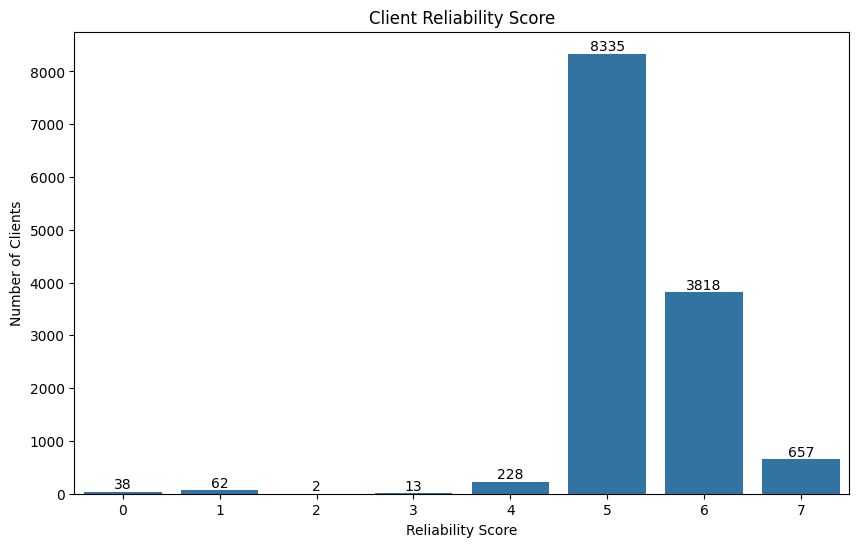

In [24]:
_, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='CLIENT_RELIABILITY', data=approved_applications)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Reliability Score')
plt.ylabel('Number of Clients')
plt.title('Client Reliability Score')
plt.show()



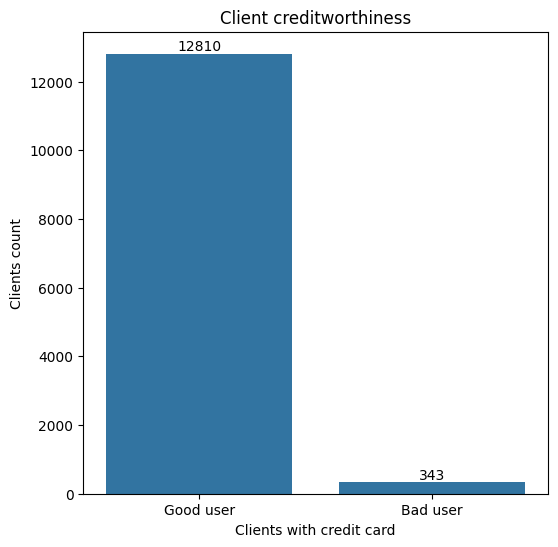

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='BAD_CLIENT', data=approved_applications)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Good user', 'Bad user'])
plt.xlabel('Clients with credit card')
plt.ylabel('Clients count')
plt.title('Client creditworthiness')
plt.show()

In [26]:
approved_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13153 entries, 0 to 13152
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13153 non-null  int64  
 1   FLAG_OWN_CAR         13153 non-null  object 
 2   FLAG_OWN_REALTY      13153 non-null  object 
 3   AMT_INCOME_TOTAL     13153 non-null  float64
 4   NAME_INCOME_TYPE     13153 non-null  object 
 5   NAME_EDUCATION_TYPE  13153 non-null  object 
 6   NAME_FAMILY_STATUS   13153 non-null  object 
 7   NAME_HOUSING_TYPE    13153 non-null  object 
 8   AGE                  13153 non-null  int64  
 9   YEARS_EMPLOYED       13153 non-null  int64  
 10  FLAG_MOBIL           13153 non-null  int64  
 11  FLAG_WORK_PHONE      13153 non-null  int64  
 12  FLAG_PHONE           13153 non-null  int64  
 13  FLAG_EMAIL           13153 non-null  int64  
 14  OCCUPATION_TYPE      11235 non-null  object 
 15  CNT_FAM_MEMBERS      13153 non-null 

In [27]:
print("Percentage of Nan values in occupation type: %.2f%%" % (approved_applications['OCCUPATION_TYPE'].isna().sum() *100 /approved_applications.shape[0]))

Percentage of Nan values in occupation type: 14.58%


In [28]:
approved_applications = approved_applications.drop(columns=["OCCUPATION_TYPE"])

In [29]:
columns_of_interest = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']
cross_tab = []
for column in columns_of_interest:
    cross_tab.append(pd.crosstab(approved_applications['CLIENT_RELIABILITY'], approved_applications[column]))
    display(cross_tab[-1])

NAME_INCOME_TYPE,Commercial associate,Pensioner,State servant,Student,Working
CLIENT_RELIABILITY,,,,,
0,15,6,1,0,16
1,13,18,6,0,25
2,1,0,0,0,1
3,5,2,0,0,6
4,64,28,19,0,117
5,2014,1368,765,2,4186
6,872,615,312,6,2013
7,150,120,54,0,333


NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CLIENT_RELIABILITY,,,,,
0,0,11,5,0,22
1,0,16,2,3,41
2,0,0,0,0,2
3,0,3,2,0,8
4,0,57,21,2,148
5,8,2298,307,94,5628
6,5,1101,145,41,2526
7,5,178,23,12,439


NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
CLIENT_RELIABILITY,,,,,
0,1,27,3,5,2
1,1,47,3,9,2
2,0,0,1,1,0
3,0,9,0,3,1
4,21,143,16,39,9
5,614,5946,469,968,338
6,307,2727,224,396,164
7,52,451,38,93,23


FLAG_OWN_REALTY,N,Y
CLIENT_RELIABILITY,,
0,10,28
1,26,36
2,1,1
3,4,9
4,108,120
5,2891,5444
6,1320,2498
7,209,448


FLAG_OWN_CAR,N,Y
CLIENT_RELIABILITY,,
0,25,13
1,42,20
2,2,0
3,8,5
4,143,85
5,5057,3278
6,2209,1609
7,417,240


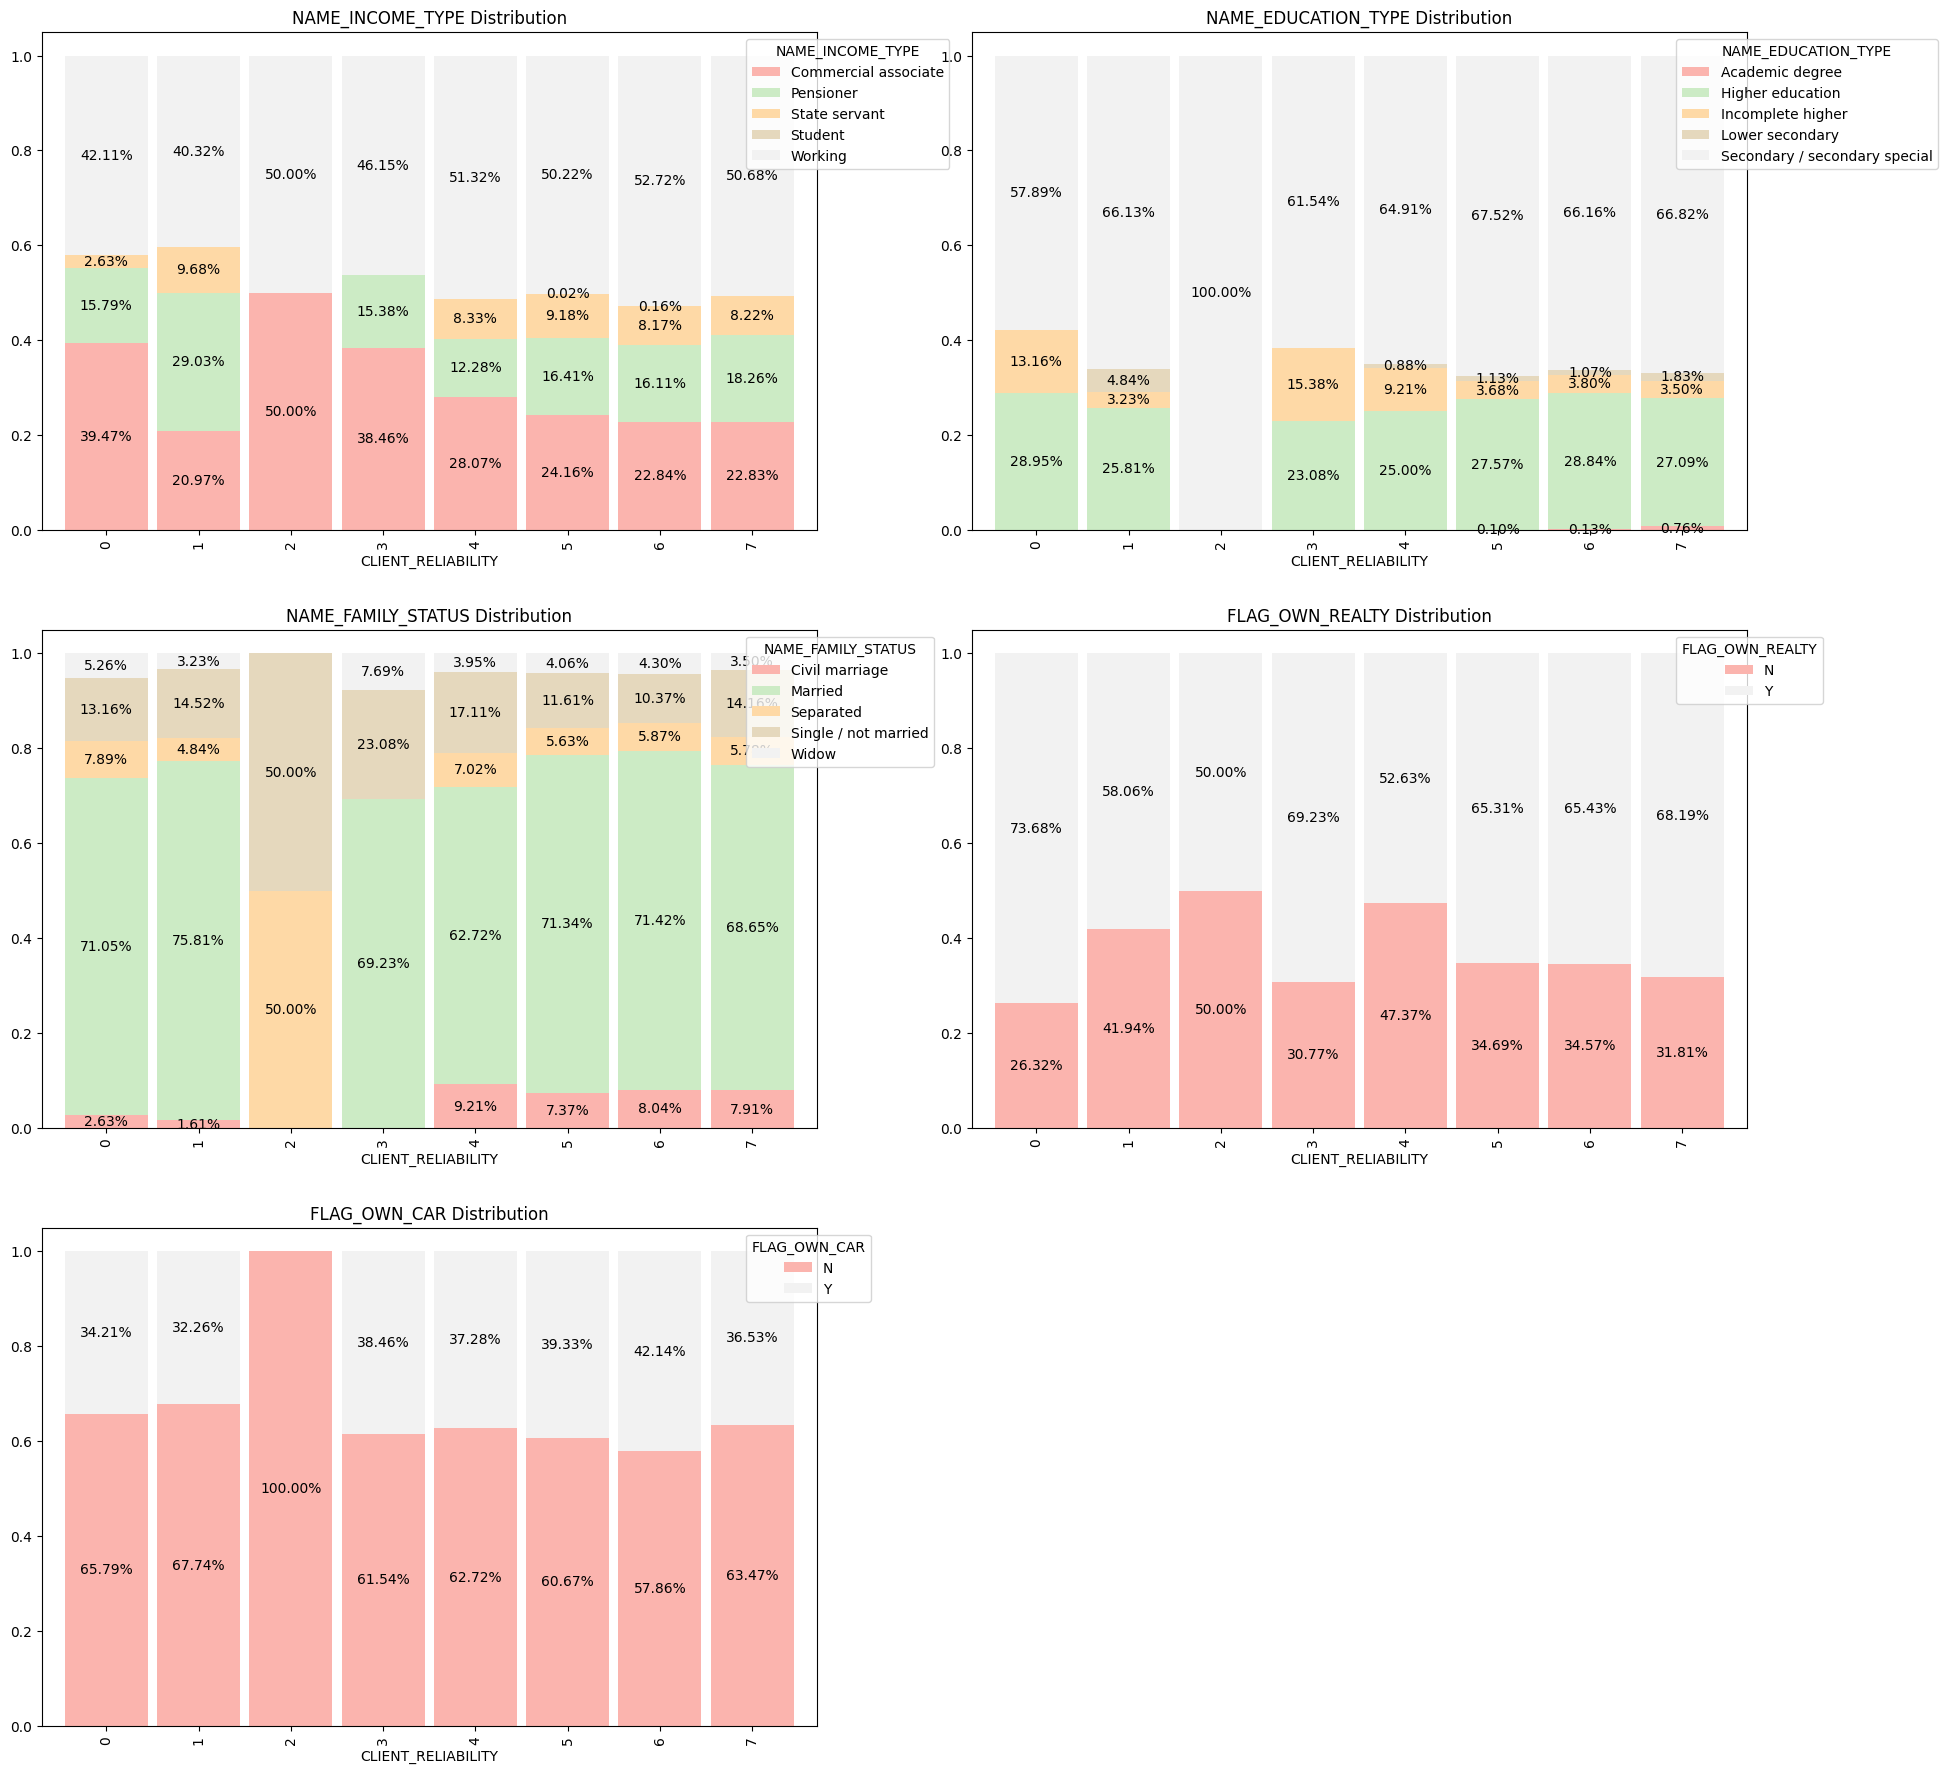

In [31]:
subplot = 0
axes = []
fig, axes = plt.subplots(3,2, figsize=(22, 22))
for column in columns_of_interest:
    cross_tab = pd.crosstab(approved_applications['CLIENT_RELIABILITY'], approved_applications[column])
    cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    cross_tab_plot = cross_tab.plot(kind='bar', stacked=True, width=0.9, ax=axes[int(subplot/2)][subplot%2], colormap='Pastel1')
    axes[int(subplot/2)][subplot%2].legend(title=column, bbox_to_anchor=(0.9, 1), loc='upper left')
    show_percentage(cross_tab_plot, cross_tab)
    plt.xlabel('Reliability Score')
    plt.ylabel('Percentage')
    axes[int(subplot/2)][subplot%2].set_title(column + ' Distribution')
    subplot += 1
axes[-1, -1].axis('off')
plt.show() 

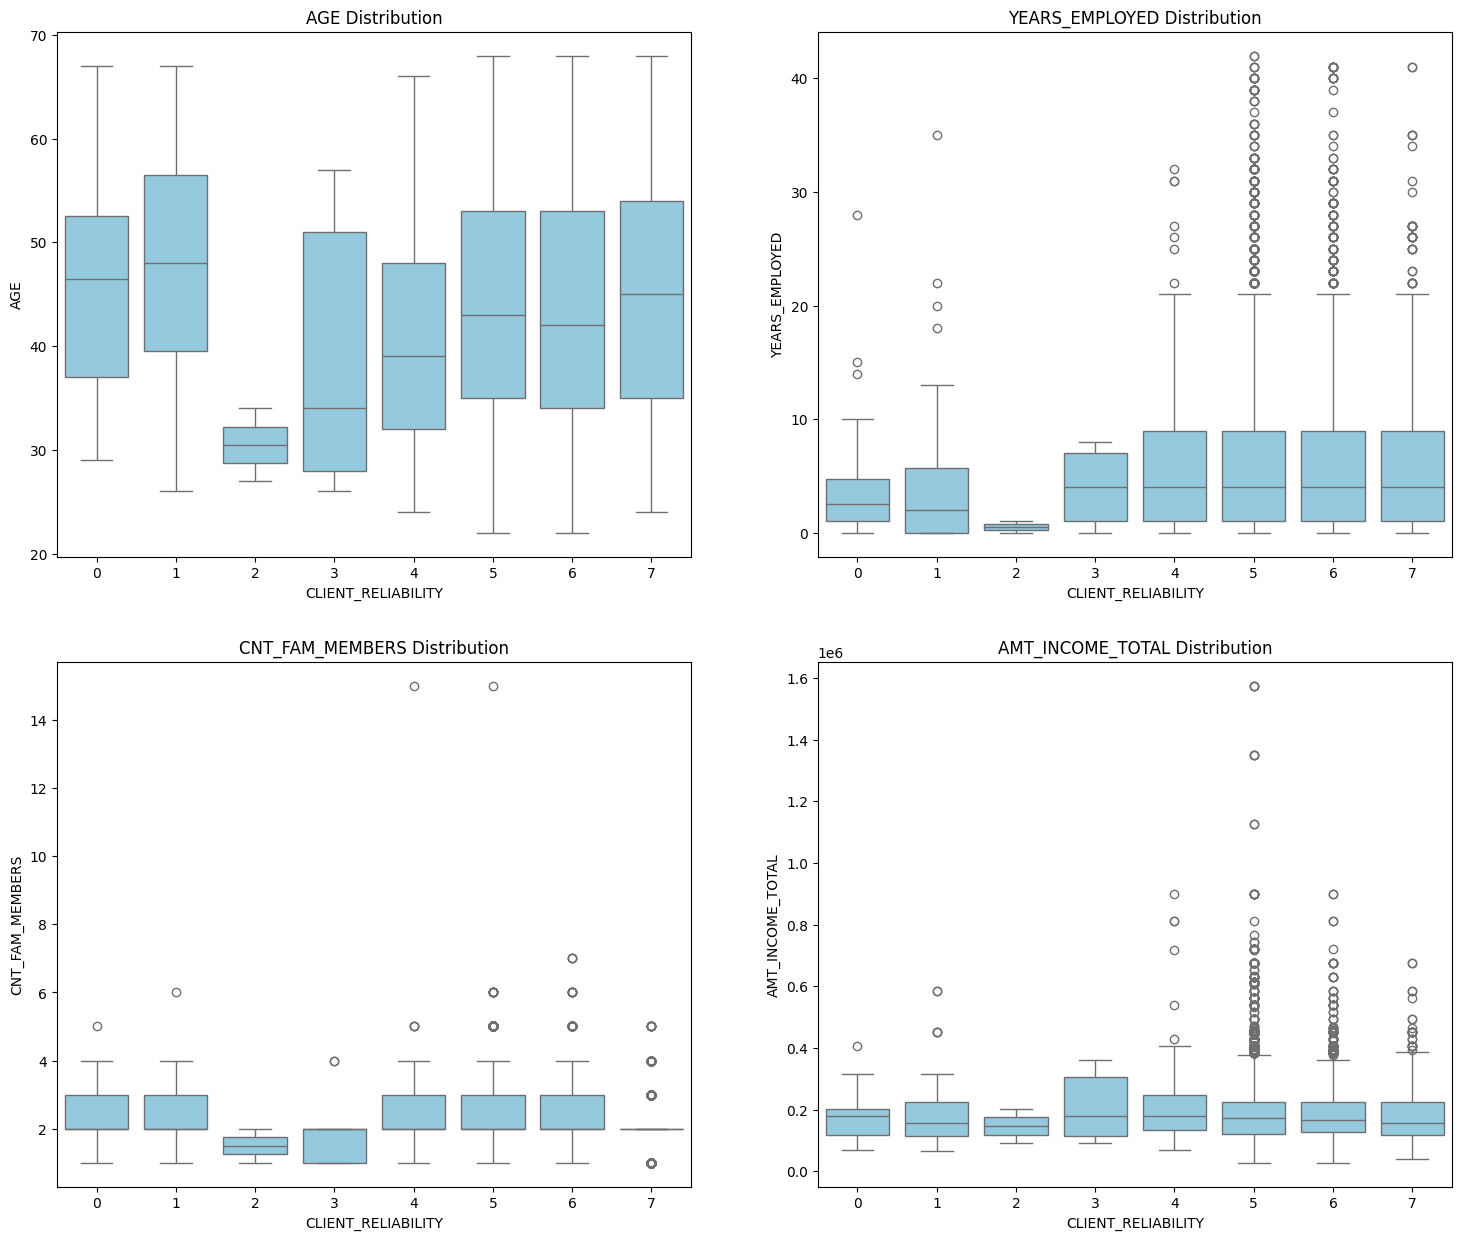

In [32]:
numerical_columns = ['AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL']
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='CLIENT_RELIABILITY', y=column, data=approved_applications, ax=axes[int(i/2)][i%2], color='skyblue')
    axes[int(i/2)][i%2].set_title(column + ' Distribution')
plt.show()


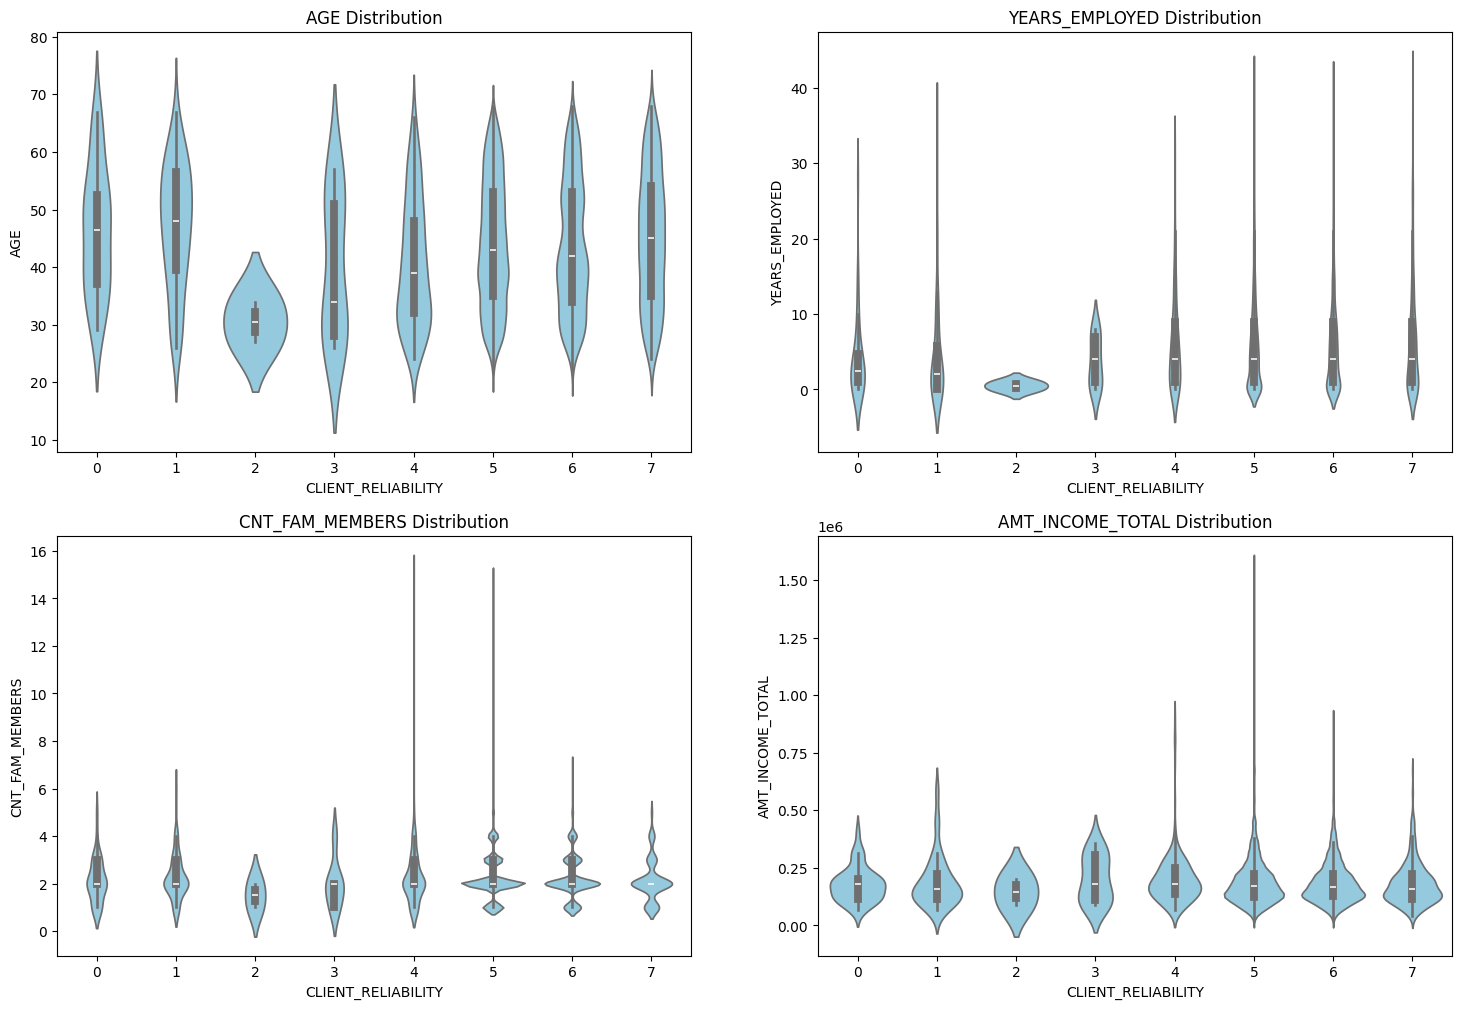

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for i, column in enumerate(numerical_columns):
    sns.violinplot(x='CLIENT_RELIABILITY', y=column, data=approved_applications, ax=axes[int(i/2)][i%2], color='skyblue')
    axes[int(i/2)][i%2].set_title(column + ' Distribution')

In [34]:
pd.crosstab(approved_applications['BAD_CLIENT'], approved_applications["NAME_EDUCATION_TYPE"][approved_applications["NAME_EDUCATION_TYPE"].isin(['Academic degree'])])

NAME_EDUCATION_TYPE,Academic degree
BAD_CLIENT,
0,18


In [36]:

columns_to_ordinal_encode = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]
columns_to_one_hot_encode = ["NAME_FAMILY_STATUS", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE"]
columns_to_scale = ["AMT_INCOME_TOTAL", "AGE", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]
columns_not_to_encode = ["FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]

X = approved_applications.drop(columns=['ID', 'CLIENT_RELIABILITY', 'BAD_CLIENT', 'FLAG_MOBIL', "NAME_HOUSING_TYPE"])
y = approved_applications['BAD_CLIENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

column_transformer = ColumnTransformer([
    ('ORDINAL', OrdinalEncoder( ), columns_to_ordinal_encode),
    ('OHE', OneHotEncoder(sparse_output=False), columns_to_one_hot_encode),
    ], 
    remainder='passthrough')

column_transformer.set_output(transform='pandas')
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)
X_train = X_train.astype('int64')
X_test = X_test.astype('int64')


In [37]:
rename_column_without_prefix(X_train, X_test, prefix="remainder__")
rename_column_without_prefix(X_train, X_test, prefix="ORDINAL__")
rename_column_without_prefix(X_train, X_test, prefix="OHE__NAME_")

Text(0.5, 1.0, 'Correlation Matrix')

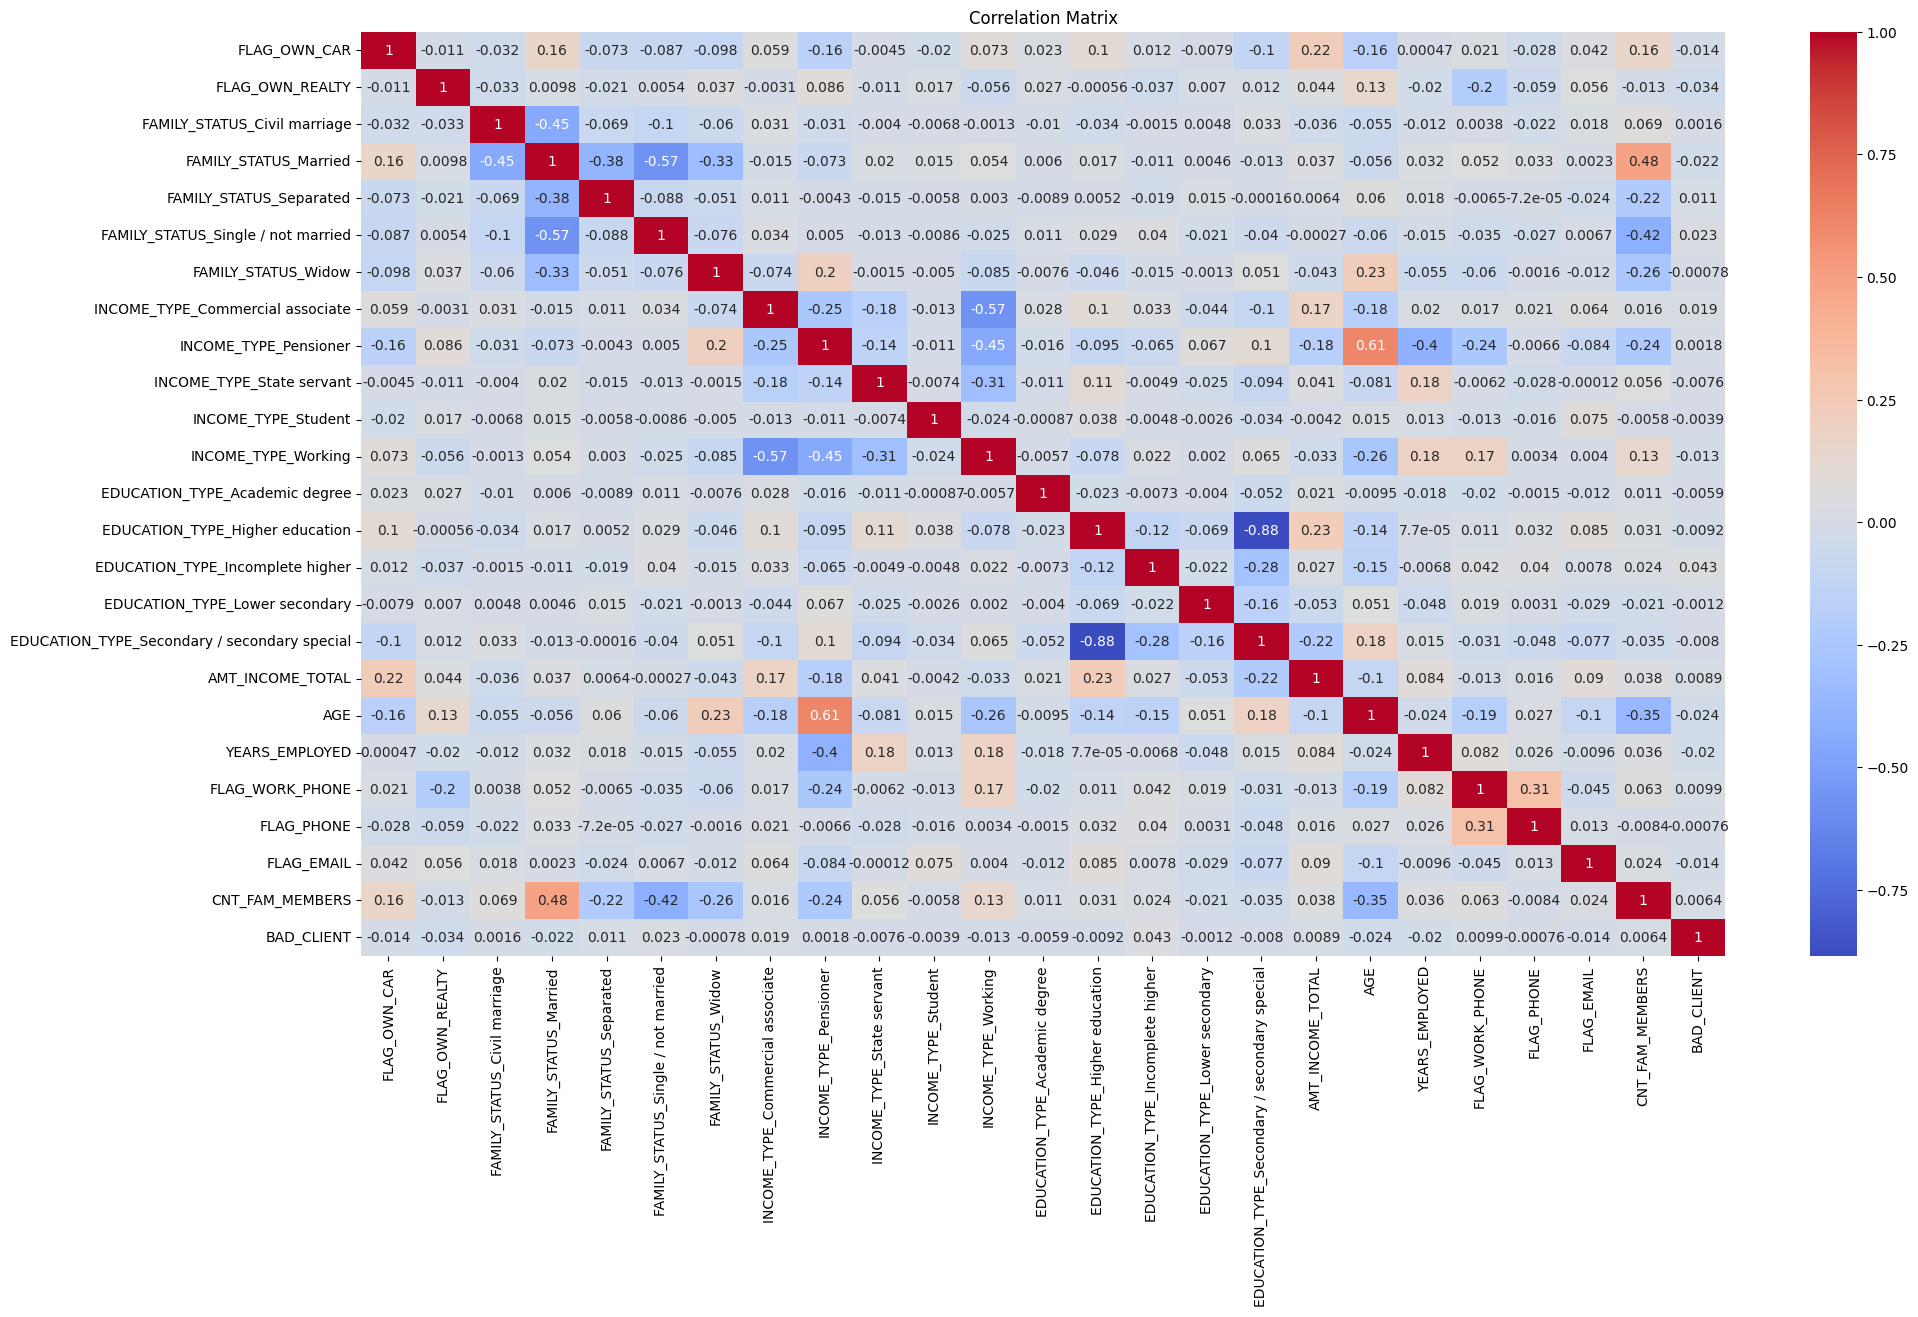

In [38]:
temp_df = X_train.join(y_train)
corr = temp_df.corr()
_, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")
plt.title("Correlation Matrix")

In [39]:
X_train_rf = X_train[["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "AGE", "YEARS_EMPLOYED", "AMT_INCOME_TOTAL", "CNT_FAM_MEMBERS", "INCOME_TYPE_Pensioner", "INCOME_TYPE_Student", "EDUCATION_TYPE_Academic degree", "FAMILY_STATUS_Married", "FAMILY_STATUS_Single / not married", "EDUCATION_TYPE_Higher education"]]
X_test_rf  =  X_test[["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "AGE", "YEARS_EMPLOYED", "AMT_INCOME_TOTAL", "CNT_FAM_MEMBERS", "INCOME_TYPE_Pensioner", "INCOME_TYPE_Student", "EDUCATION_TYPE_Academic degree", "FAMILY_STATUS_Married", "FAMILY_STATUS_Single / not married", "EDUCATION_TYPE_Higher education"]]


In [40]:
std_scaler_transformer = ColumnTransformer([
    ('STD_SCALER', StandardScaler(), columns_to_scale)
    ], 
    remainder='passthrough')
std_scaler_transformer.set_output(transform='pandas')
X_train_std = std_scaler_transformer.fit_transform(X_train_rf)
X_test_std = std_scaler_transformer.transform(X_test_rf)
X_train_std = X_train_std.astype('int64')
X_test_std = X_test_std.astype('int64')
rename_column_without_prefix(X_train_std, X_test_std, prefix="remainder__")
X_train_std.head()


,STD_SCALER__AMT_INCOME_TOTAL,STD_SCALER__AGE,STD_SCALER__YEARS_EMPLOYED,STD_SCALER__CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,INCOME_TYPE_Pensioner,INCOME_TYPE_Student,EDUCATION_TYPE_Academic degree,FAMILY_STATUS_Married,FAMILY_STATUS_Single / not married,EDUCATION_TYPE_Higher education
11443,0,0,0,0,0,1,0,0,0,1,0,0
9752,0,1,0,0,0,1,0,0,0,1,0,1
5632,0,0,0,1,0,1,0,0,0,0,0,0
7700,0,1,0,0,0,1,1,0,0,1,0,0
9208,0,0,0,0,0,1,0,0,0,1,0,0


In [41]:
print(approved_applications["BAD_CLIENT"].value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

BAD_CLIENT
0    12810
1      343
Name: count, dtype: int64
BAD_CLIENT
0    10254
1      268
Name: count, dtype: int64
BAD_CLIENT
0    2556
1      75
Name: count, dtype: int64


In [42]:
smote = SMOTE(sampling_strategy=0.7, random_state=RANDOM_STATE)
X_train_std_smt, y_train_smote = smote.fit_resample(X_train_std, y_train)
print("SMOTE: ", y_train_smote.value_counts())

rus = RandomUnderSampler(sampling_strategy=0.75, random_state=RANDOM_STATE)
X_train_stdrus, y_train_rus = rus.fit_resample(X_train_std, y_train)
print("Undersampling: ", y_train_rus.value_counts())


SMOTE:  BAD_CLIENT
0    10254
1     7177
Name: count, dtype: int64
Undersampling:  BAD_CLIENT
0    357
1    268
Name: count, dtype: int64


Train Set Accuracy:  0.58
              precision    recall  f1-score   support

           0       0.68      0.55      0.61     10254
           1       0.50      0.63      0.56      7177

    accuracy                           0.58     17431
   macro avg       0.59      0.59      0.58     17431
weighted avg       0.61      0.58      0.59     17431

--------------------
Test Set Accuracy:  0.54
              precision    recall  f1-score   support

           0       0.98      0.54      0.69      2556
           1       0.04      0.60      0.07        75

    accuracy                           0.54      2631
   macro avg       0.51      0.57      0.38      2631
weighted avg       0.95      0.54      0.68      2631



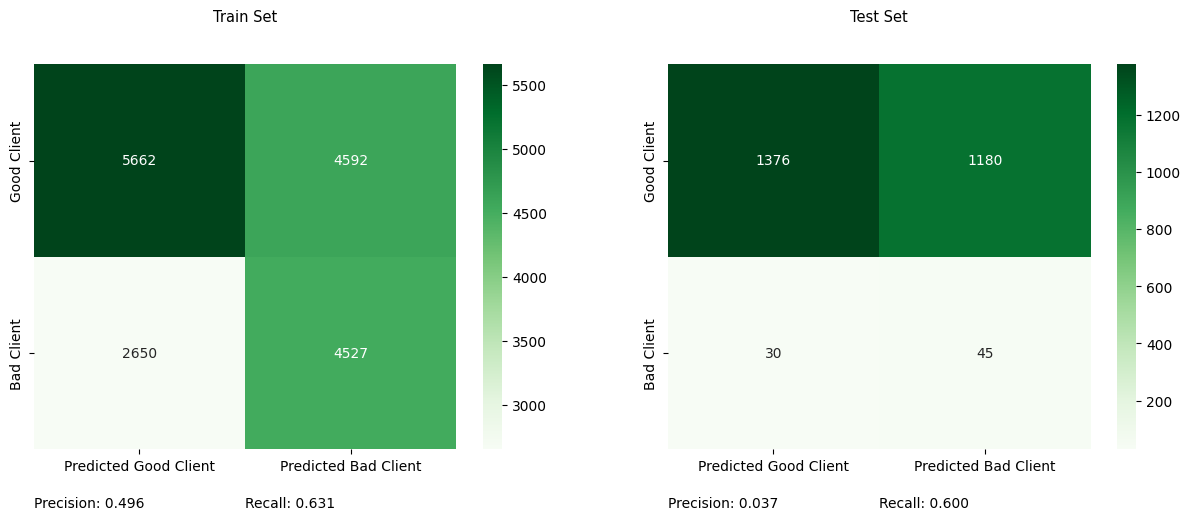

In [44]:
log_reg_smt, report_train_smt, report_test_smt = perform_logistic_regression(X_train_std_smt, y_train_smote, X_test_std, y_test, class_weight='balanced')

Train Set Accuracy:  0.59
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       357
           1       0.55      0.29      0.38       268

    accuracy                           0.59       625
   macro avg       0.58      0.56      0.54       625
weighted avg       0.58      0.59      0.56       625

--------------------
Test Set Accuracy:  0.79
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2556
           1       0.04      0.24      0.06        75

    accuracy                           0.79      2631
   macro avg       0.50      0.52      0.47      2631
weighted avg       0.95      0.79      0.86      2631



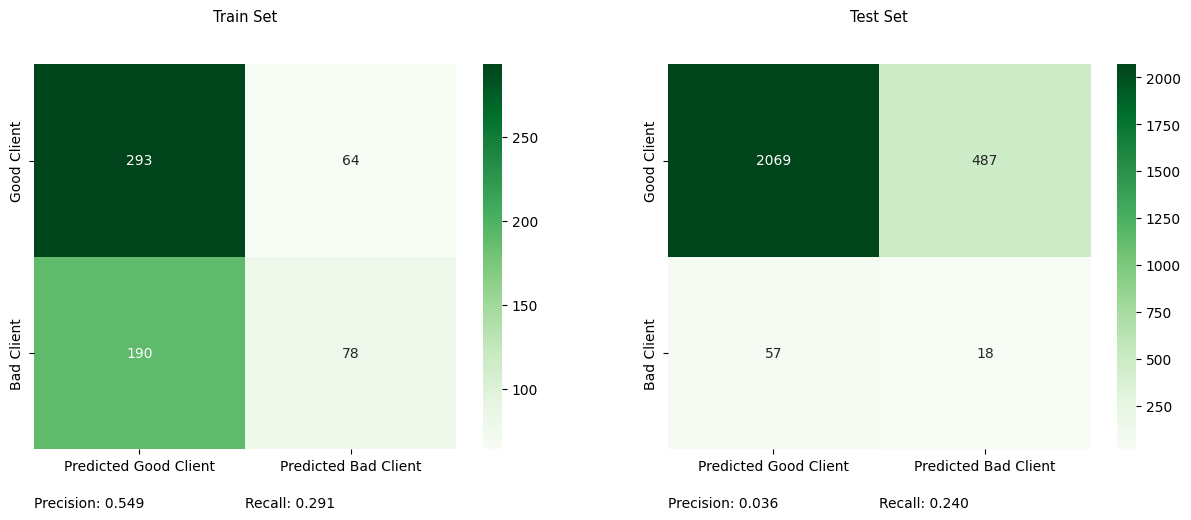

In [45]:
log_reg_ru = perform_logistic_regression(X_train_stdrus, y_train_rus, X_test_std, y_test)

In [46]:
smote = SMOTE(sampling_strategy=0.15, random_state=RANDOM_STATE)
X_train_std_smt03, y_train_smt03 = smote.fit_resample(X_train_std, y_train)
under = RandomUnderSampler(sampling_strategy=.15, random_state=RANDOM_STATE)
X_train_std_smt03rus, y_train_smt03rus = under.fit_resample(X_train_std_smt03, y_train_smt03)

print(y_train_smt03rus.value_counts())
print(X_train_std_smt03rus.shape)

BAD_CLIENT
0    10253
1     1538
Name: count, dtype: int64
(11791, 12)


Train Set Accuracy:  0.61
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     10253
           1       0.17      0.51      0.25      1538

    accuracy                           0.61     11791
   macro avg       0.53      0.57      0.49     11791
weighted avg       0.80      0.61      0.67     11791

--------------------
Test Set Accuracy:  0.61
              precision    recall  f1-score   support

           0       0.98      0.61      0.75      2556
           1       0.04      0.53      0.07        75

    accuracy                           0.61      2631
   macro avg       0.51      0.57      0.41      2631
weighted avg       0.95      0.61      0.73      2631



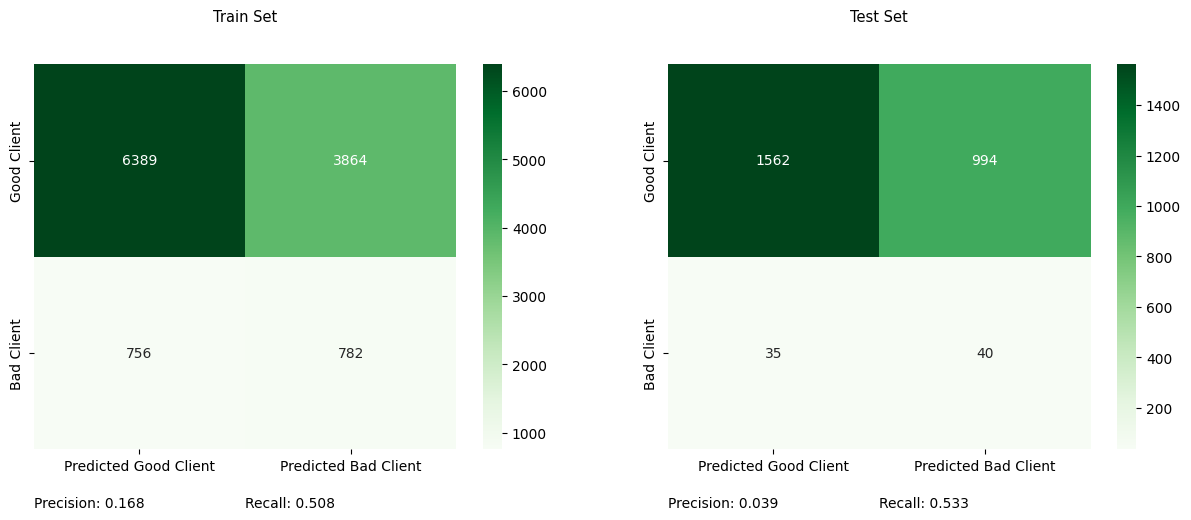

In [47]:
log_reg_smt03rus = perform_logistic_regression(X_train_std_smt03rus, y_train_smt03rus, X_test_std, y_test, class_weight='balanced', threshold=0.5)

In [48]:
X_train.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,INCOME_TYPE_Commercial associate,INCOME_TYPE_Pensioner,INCOME_TYPE_State servant,...,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
11443,0,1,0,1,0,0,0,1,0,0,...,0,0,1,90000,53,7,0,0,0,2
9752,0,1,0,1,0,0,0,0,0,1,...,0,0,0,157500,55,0,1,1,0,2
5632,0,1,1,0,0,0,0,0,0,0,...,0,0,1,189000,37,0,0,1,0,4
7700,0,1,0,1,0,0,0,0,1,0,...,0,0,1,90000,60,0,0,0,1,2
9208,0,1,0,1,0,0,0,0,0,0,...,0,0,1,157500,36,4,0,0,0,3


In [49]:
rnd_forest = BalancedRandomForestClassifier(random_state=RANDOM_STATE,
    replacement=True, bootstrap=True, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt'],
    'sampling_strategy': [0.5, 0.75, 1.]
}
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
    grid_search_1 = GridSearchCV(rnd_forest, param_grid, cv=cv,  n_jobs=-1)
grid_search_1.fit(X_train_rf, y_train)

print(grid_search_1.best_params_)


{'max_features': 'sqrt', 'n_estimators': 500, 'sampling_strategy': 0.5}


In [50]:
best_rnd_forest = grid_search_1.best_estimator_
best_rnd_forest.fit(X_train_rf, y_train)
y_pred_train = np.where(best_rnd_forest.predict_proba(X_train_rf)[:,1]>0.5, 1, 0)
y_pred = np.where(best_rnd_forest.predict_proba(X_test_rf)[:,1]>0.5, 1, 0)
accuracy_score(y_test, y_pred)

0.9034587609274041

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10254
           1       0.27      1.00      0.42       268

    accuracy                           0.93     10522
   macro avg       0.63      0.96      0.69     10522
weighted avg       0.98      0.93      0.95     10522

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2556
           1       0.14      0.48      0.22        75

    accuracy                           0.90      2631
   macro avg       0.56      0.70      0.58      2631
weighted avg       0.96      0.90      0.93      2631



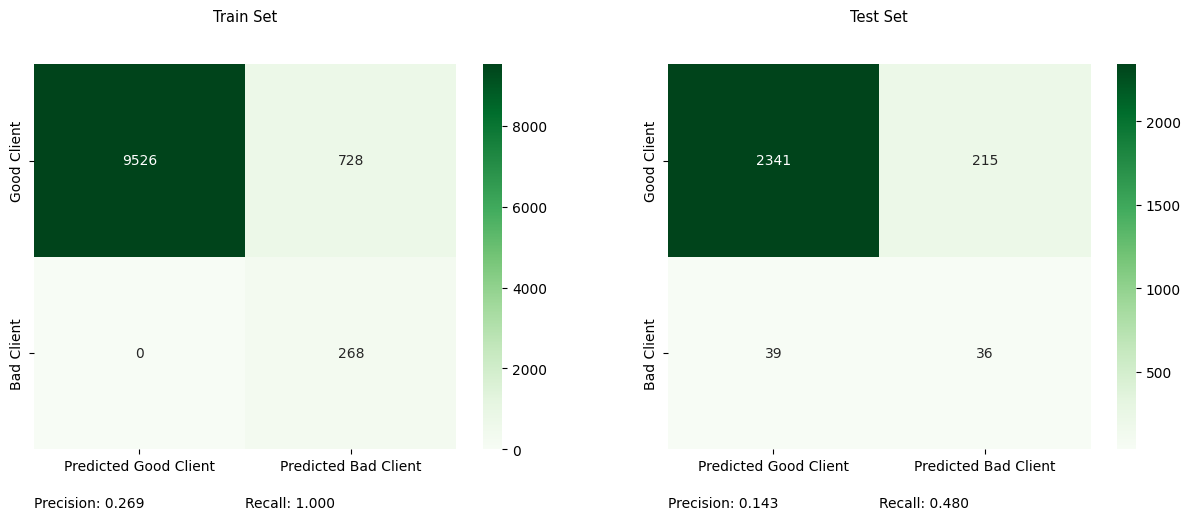

In [51]:
report_train_rf = classification_report(y_train, y_pred_train)
report_test_rf = classification_report(y_test, y_pred)
print(report_train_rf)
print(report_test_rf)
print_train_test_confusion_matrix(train_matrix=confusion_matrix(y_train, y_pred_train), test_matrix=confusion_matrix(y_test, y_pred), 
                           train_title="Train Set\n\n", test_title="Test Set\n\n")

In [52]:
balanced_model = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), replacement=True, random_state=RANDOM_STATE, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_samples': [0.75, 1.],
    'max_features': [0.5, 0.75, 1.]
}
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
    grid_search = GridSearchCV(balanced_model, param_grid, cv=cv, n_jobs=-1)

grid_search.fit(X_train_rf, y_train)
print(grid_search.best_params_)


{'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 500}


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10254
           1       0.24      1.00      0.38       268

    accuracy                           0.92     10522
   macro avg       0.62      0.96      0.67     10522
weighted avg       0.98      0.92      0.94     10522

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2556
           1       0.14      0.51      0.22        75

    accuracy                           0.90      2631
   macro avg       0.56      0.71      0.58      2631
weighted avg       0.96      0.90      0.92      2631



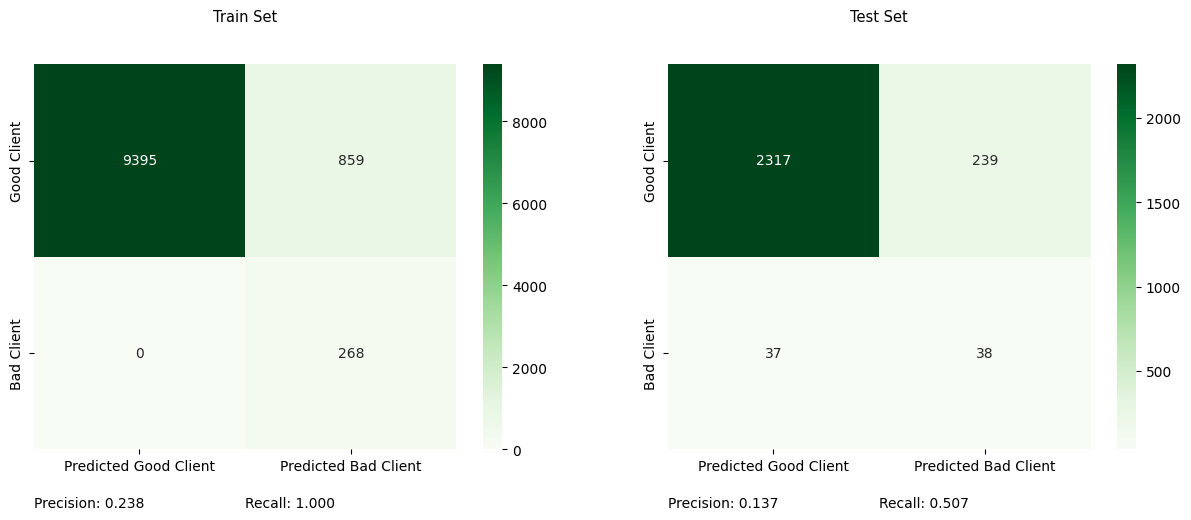

In [53]:
best_balanced_model = grid_search.best_estimator_
best_balanced_model.fit(X_train_rf, y_train)

y_pred_train = np.where(best_balanced_model.predict_proba(X_train_rf)[:,1]>0.525, 1, 0)
y_pred = np.where(best_balanced_model.predict_proba(X_test_rf)[:,1]>0.525, 1, 0)
accuracy_score(y_test, y_pred)

report_train_bb = classification_report(y_train, y_pred_train)
report_test_bb = classification_report(y_test, y_pred)
print(report_train_bb)
print(report_test_bb)

print_train_test_confusion_matrix(train_matrix=confusion_matrix(y_train, y_pred_train), test_matrix=confusion_matrix(y_test, y_pred), 
                           train_title="Train Set\n\n", test_title="Test Set\n\n")

In [54]:
norm_transformer = ColumnTransformer([
    ('NORM', MinMaxScaler(), columns_to_scale)
    ], 
    remainder='passthrough')

norm_transformer.set_output(transform='pandas')
X_train_norm = norm_transformer.fit_transform(X_train_rf)
X_test_norm = norm_transformer.transform(X_test_rf)
rename_column_without_prefix(X_train_norm, X_test_norm, prefix="remainder__")
X_train_norm.head()

,NORM__AMT_INCOME_TOTAL,NORM__AGE,NORM__YEARS_EMPLOYED,NORM__CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,INCOME_TYPE_Pensioner,INCOME_TYPE_Student,EDUCATION_TYPE_Academic degree,FAMILY_STATUS_Married,FAMILY_STATUS_Single / not married,EDUCATION_TYPE_Higher education
11443,0.040698,0.673913,0.166667,0.071429,0,1,0,0,0,1,0,0
9752,0.084302,0.717391,0.000000,0.071429,0,1,0,0,0,1,0,1
5632,0.104651,0.326087,0.000000,0.214286,0,1,0,0,0,0,0,0
7700,0.040698,0.826087,0.000000,0.071429,0,1,1,0,0,1,0,0
9208,0.084302,0.304348,0.095238,0.142857,0,1,0,0,0,1,0,0


In [55]:
smote = SMOTE(sampling_strategy=0.3, random_state=RANDOM_STATE)
X_train_norm_smt03, y_train_norm_smt03 = smote.fit_resample(X_train_norm, y_train)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=RANDOM_STATE)
X_train_norm_smt03rus, y_train_norm_smt03rus = under.fit_resample(X_train_norm_smt03, y_train_norm_smt03)

print(y_train_norm_smt03rus.value_counts())
print(X_train_norm_smt03rus.shape)


mlp = MLPClassifier(hidden_layer_sizes=(100, 150, 225), max_iter=1000, random_state=RANDOM_STATE)
mlp.fit(X_train_norm_smt03rus, y_train_norm_smt03rus)
y_pred = mlp.predict(X_test_norm)
accuracy_score(y_test, y_pred)


BAD_CLIENT
0    6152
1    3076
Name: count, dtype: int64
(9228, 12)


0.8859749144811858

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      6152
           1       0.88      0.95      0.91      3076

    accuracy                           0.94      9228
   macro avg       0.93      0.94      0.93      9228
weighted avg       0.94      0.94      0.94      9228

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2556
           1       0.10      0.37      0.16        75

    accuracy                           0.89      2631
   macro avg       0.54      0.64      0.55      2631
weighted avg       0.95      0.89      0.92      2631



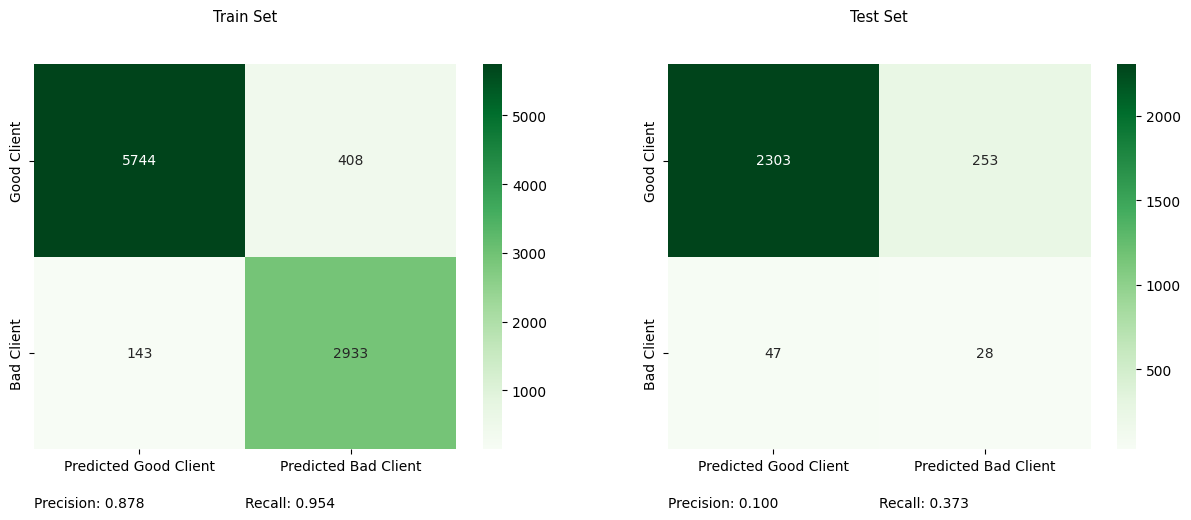

In [56]:
y_pred_train = np.where(mlp.predict_proba(X_train_norm_smt03rus)[:,1]>0.5, 1, 0)
y_pred = np.where(mlp.predict_proba(X_test_norm)[:,1]>0.5, 1, 0)
           

report_train_mlp = classification_report(y_train_norm_smt03rus, y_pred_train)
report_test_mlp = classification_report(y_test, y_pred)
print(report_train_mlp)
print(report_test_mlp)
print_train_test_confusion_matrix(train_matrix=confusion_matrix(y_train_norm_smt03rus, y_pred_train), test_matrix=confusion_matrix(y_test, y_pred), 
                           train_title="Train Set\n\n", test_title="Test Set\n\n")

In [66]:
# Dare un feedback al cliente del perchè non è stato accettato il credito
#Procediamo:
y_pred = np.where(best_balanced_model.predict_proba(X_test_rf)[:,1]>0.525, 1, 0)
correctly_classified_clients = approved_applications.loc[y_test[y_test == y_pred].index]
correctly_classified_clients



,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CLIENT_RELIABILITY,BAD_CLIENT
6815,5079011,Y,Y,270000.0,Commercial associate,Incomplete higher,Married,House / apartment,41,3,1,0,1,0,4.0,5,0
1905,5028408,Y,Y,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,40,3,1,0,0,0,2.0,5,0
8158,5095269,Y,Y,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,28,2,1,0,0,0,2.0,6,0
5413,5061835,Y,Y,180000.0,State servant,Lower secondary,Married,House / apartment,44,10,1,1,1,0,2.0,5,0
6928,5085900,N,Y,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61,0,1,0,0,0,2.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,5092203,Y,Y,180000.0,Working,Higher education,Married,House / apartment,32,13,1,0,1,0,2.0,6,0
10972,5125748,N,Y,292500.0,Pensioner,Secondary / secondary special,Married,House / apartment,56,0,1,0,0,0,2.0,5,0
10310,5116578,N,Y,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,56,7,1,0,1,0,1.0,6,0
8824,5117751,Y,N,306000.0,Working,Secondary / secondary special,Married,House / apartment,43,4,1,0,0,0,2.0,6,0
